In [16]:
import pandas as pd
essays = pd.read_csv('trained.csv')
essays.set_index('essay_id',inplace=True, drop=True)

def newCols(essays):
    correctNew = []
    misspeltNew = []
    nounsNew = []
    verbsNew = []
    adverbsNew = []
    adjectivesNew = []
    for index,essay in essays.iterrows():
        correctNew.append(essay.correct/essay.length*100)
        misspeltNew.append(essay.misspelt/essay.length*100)
        nounsNew.append(essay.nouns/essay.length*100)
        verbsNew.append(essay.adverbs/essay.length*100)
        adverbsNew.append(essay.adverbs/essay.length*100)
        adjectivesNew.append(essay.adjectives/essay.length*100)
    essays = essays.assign(correctN = correctNew)
    essays = essays.assign(misspeltN = misspeltNew)
    essays = essays.assign(nounsN = nounsNew)
    essays = essays.assign(verbsN = verbsNew)
    essays = essays.assign(adverbsN = adverbsNew)
    essays = essays.assign(adjectivesN = adjectivesNew)
    return essays
essays = newCols(essays)
essays = essays.drop(['misspelt','correct','nouns','verbs','adverbs','adjectives'],axis=1)
essays.to_csv("trainedPt2.csv",index=False)
X = essays.drop(['domain1_score','essay','essay_set','normal_score',], axis=1)
y = essays['normal_score']
X.head()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
essay_id,,,,,,,,,,
14834,123,1.37,9,3,94.308943,4.878049,22.764228,6.504065,6.504065,8.130081
14835,180,1.55,10,6,93.888889,6.111111,22.777778,6.666667,6.666667,7.777778
14836,169,1.62,9,24,96.449704,1.775148,23.076923,5.917160,5.917160,5.325444
14837,199,1.69,11,4,87.939698,9.045226,17.587940,3.517588,3.517588,2.010050
14838,162,1.74,11,8,97.530864,2.469136,21.604938,4.938272,4.938272,9.259259


In [2]:
normalized_X=(X-X.min())/(X.max()-X.min())
from sklearn.preprocessing import StandardScaler
col_to_std = ['length','lexical_diversity','n_sentences','wordnetscore','correctN','misspeltN','nounsN','verbsN','adverbsN','adjectivesN']
X[col_to_std] = StandardScaler().fit_transform(X[col_to_std])
X.head()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
essay_id,,,,,,,,,,
14834,-0.564170,-1.139380,0.043467,-1.033892,0.507557,-0.498194,0.140759,0.499554,0.499554,0.732825
14835,0.447114,-0.200283,0.332181,0.012597,0.397134,-0.155581,0.144711,0.574577,0.574577,0.580263
14836,0.251954,0.164922,0.043467,6.291528,1.070317,-1.360350,0.231964,0.228764,0.228764,-0.481705
14837,0.784208,0.530126,0.620895,-0.685062,-1.166780,0.659678,-1.369028,-0.878365,-0.878365,-1.917415
14838,0.127761,0.790986,0.620895,0.710256,1.354531,-1.167522,-0.197375,-0.222881,-0.222881,1.221809


In [3]:
normalized_X.corr()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
length,1.000000,0.704630,0.784995,0.600038,-0.116262,0.108707,0.022393,0.048700,0.048700,0.044306
lexical_diversity,0.704630,1.000000,0.505644,0.394189,0.044281,-0.057293,0.044152,-0.190167,-0.190167,-0.219457
n_sentences,0.784995,0.505644,1.000000,0.466756,-0.167746,0.163243,0.003968,0.095274,0.095274,0.090742
wordnetscore,0.600038,0.394189,0.466756,1.000000,0.037196,-0.025936,0.021304,0.132317,0.132317,0.056399
correctN,-0.116262,0.044281,-0.167746,0.037196,1.000000,-0.955984,-0.045721,0.016804,0.016804,-0.075020
misspeltN,0.108707,-0.057293,0.163243,-0.025936,-0.955984,1.000000,0.031232,0.019553,0.019553,0.105793
nounsN,0.022393,0.044152,0.003968,0.021304,-0.045721,0.031232,1.000000,-0.303579,-0.303579,-0.095574
verbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adverbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adjectivesN,0.044306,-0.219457,0.090742,0.056399,-0.075020,0.105793,-0.095574,0.228514,0.228514,1.000000


In [4]:
from sklearn.model_selection import train_test_split
# Split X and y into X_
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(n_X_train, n_y_train)


LinearRegression()

In [5]:
regression_model.coef_

array([ 3.69293551, -0.40793348,  0.44695263,  2.51322157,  3.3054924 ,
        2.57487967,  1.58292482,  0.34557344,  0.34557344,  1.23970997])

In [6]:
from sklearn.metrics import r2_score,accuracy_score
print(regression_model.score(n_X_test, n_y_test))
y_pred = regression_model.predict(n_X_test)

0.5541919471699364


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_random = RandomForestClassifier(criterion='entropy', 
                            n_estimators=1000, 
                            min_samples_leaf=4, 
                            min_samples_split=2, 
                            max_features='auto',
                            max_depth=None,
                            bootstrap=True,
                            random_state=2)

# Fit rf to the training set    
rf_random.fit(n_X_train, n_y_train)

# predict
n_y_pred = rf_random.predict(n_X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(n_y_test, n_y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(n_y_test, n_y_pred))
print('\n')

=== Confusion Matrix ===
[[  1   5   2   1   0]
 [  1  10  21   9   0]
 [  0   4  43  32   2]
 [  0   0  13 136  20]
 [  0   0   0  28  32]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.53      0.24      0.33        41
           2       0.54      0.53      0.54        81
           3       0.66      0.80      0.73       169
           4       0.59      0.53      0.56        60

    accuracy                           0.62       360
   macro avg       0.56      0.44      0.47       360
weighted avg       0.60      0.62      0.60       360





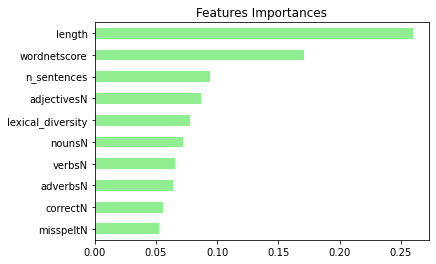

In [11]:
from matplotlib import pyplot as plt
 
importances = pd.Series(data=rf_random.feature_importances_, index= n_X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()